In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import matplotlib.ticker as mticker 
from numpy import *
from matplotlib.pyplot import *
from iris.analysis import *
from iris.coord_categorisation import * 
from iris.analysis.cartography import * 
from scipy.stats import *
from scipy.stats.mstats import *
from iris import *

import warnings
warnings.filterwarnings("ignore")


fgname = ('/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/fgco2_files/fgco2_picontrol/outfile')
fgcube = iris.load(fgname)
fgcube1=fgcube[2] 

#extract Jan and Dec to average the sea ice concentration across these mon
add_month_number(fgcube1, 'time', name='month_number1')
fgcube2 = fgcube1[np.where((fgcube1.coord('month_number1').points == 12))]
#then to average this by each year, so that you have the December-Jan for
add_season_year(fgcube2, 'time', name='season_year')
#then average by the season year:
fgcube2.aggregated_by(['season_year'], iris.analysis.MEAN)
#cube2 is therefore the data per season


# Extract the regionan of interst across teh whole cube just once at that start
west = -210 
east = -130 
south = -55
north = -50


fg_temporary_cube = fgcube2.intersection(longitude = (west, east)) 
fgcube3 = fg_temporary_cube.intersection(latitude = (south, north))


fgcube4=fgcube3*31536000000

#start of the loop
#for i in range (0,2101-2015):
#regional_cube=fgcube2[i,:,:]
#ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0)))
  



In [2]:
def area_avg(cube): 
    try:
        cube.coord('latitude').guess_bounds() 
    except:
        pass 
    try:
        cube.coord('longitude').guess_bounds() 
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'],iris.analysis.MEAN, weights=grid_areas)
        

In [3]:
masked_co2_flux_timeseries = area_avg(fgcube4)

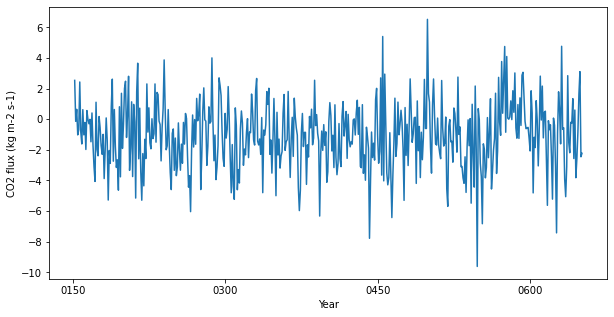

In [8]:
plt.figure(figsize=(10,5)) 
iplt.plot(masked_co2_flux_timeseries) 

plt.ylabel('CO2 flux (kg m-2 s-1)') 
plt.xlabel('Year')
plt.savefig('open_ocean_flux')

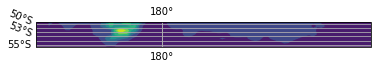

In [25]:
ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0))) 
my_plot = iplt.contourf(fgcube2[0])
plt.gca().gridlines(draw_labels=True)